# Introduction
Dünya Mutluluk Raporu, küresel mutluluğun durumunun önemli bir araştırmasıdır.
Bu defter Dünya Mutluluk Raporuyla ilgilidir. Çeşitli faktörler incelenerek ve ülkelerin mutluluk düzeylerinin analizleri yapılacaktır. 
<font color = 'purple'>
1. [Importing Library](#1)
2. [Load and Check Data](#2)
3. [Variable Description](#3)
4. [Missing Value](#4)
5. [Data Analysis](#5)

<a id = "1"></a><br>
# 1. Importing Library

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-pastel")
import plotly.express as px  #for map
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from collections import Counter
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [287]:
#plt.style.available

**Bu kodu kullanarak farklı stilleri görebiliriz.**

<a id = "2"></a><br>

# 2. Load and Check Data

In [263]:
data1=pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding='latin1')
data2=pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding='latin1')

**Dosya, utf-8 kodlaması dışında bir karakter kodlamasıyla kaydedildiği için Python, utf-8 ile dosyayı okurken bazı karakterleri çözemiyor. Bu yüzden dosyayı dönüştürmek yerine, daha geniş bir karakter seti sunan latin-1 kodlamasıyla doğrudan okuyarak hatayı çözüyoruz.**

In [264]:
diff = set(data1.columns).symmetric_difference(set(data2.columns))
print(diff)

{'year', 'Healthy life expectancy at birth', 'Regional indicator', 'Negative affect', 'lowerwhisker', 'Life Ladder', 'Dystopia + residual', 'upperwhisker', 'Healthy life expectancy', 'Positive affect', 'Ladder score'}


 **data1 ve data2 içindeki farklı değerler gösterildi.**

In [265]:
data=pd.concat([data1, data2],axis=0).reset_index(drop=True)

**data1 ve data2 verileri birleştirildi**

In [266]:
data.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Regional indicator', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Healthy life expectancy', 'Dystopia + residual'],
      dtype='object')

In [267]:
data['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

In [268]:
data['Country name'].nunique()

166

**Data dosyanın içinde 166 tane ülke vardır.**

In [269]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Healthy life expectancy,Dystopia + residual
0,Afghanistan,2008.0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009.0,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010.0,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011.0,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012.0,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,NaN,NaN,NaN,NaN,NaN,NaN


<a id = "3"></a><br>
# 3. Variable Description
<font color = 'blue'>

1. Life Ladder
2. Ladder score
3. upperwhiske
4. Healthy life expectancy at birth
5. Positive affect
6. year
7. Negative affect
8. lowerwhisker
9. Dystopia + residual
10. Regional indicator
11. Healthy life expectancy

In [270]:
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder score,upperwhisker,lowerwhisker,Healthy life expectancy,Dystopia + residual
count,2363.000000,2363.000000,2475.000000,2490.000000,2300.000000,2467.000000,2422.000000,2378.000000,2339.000000,2347.000000,143.000000,143.000000,143.000000,140.000000,140.000000
mean,2014.763860,5.483566,8.945966,0.827640,63.401828,0.742924,0.008547,0.709245,0.651882,0.273151,5.527580,5.641175,5.413972,0.520886,1.575914
std,5.059436,1.125522,2.167247,0.160238,6.842644,0.143897,0.161287,0.228866,0.106240,0.087131,1.170717,1.155008,1.187133,0.164923,0.537459
min,2005.000000,1.281000,0.000000,0.000000,6.720000,0.000000,-0.340000,0.000000,0.179000,0.083000,1.721000,1.775000,1.667000,0.000000,-0.073000
25%,2011.000000,4.647000,8.310500,0.747000,59.195000,0.651000,-0.107000,0.653000,0.572000,0.209000,4.726000,4.845500,4.606000,0.398000,1.308250
50%,2015.000000,5.449000,9.426000,0.841000,65.100000,0.764000,-0.009500,0.789000,0.663000,0.262000,5.785000,5.895000,5.674000,0.549500,1.644500
75%,2019.000000,6.323500,10.340500,0.910000,68.552500,0.856000,0.111000,0.863000,0.737000,0.326000,6.416000,6.507500,6.319000,0.648500,1.881750
max,2023.000000,8.019000,11.676000,1.617000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000,7.741000,7.815000,7.667000,0.857000,2.998000


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2506 non-null   object 
 1   year                              2363 non-null   float64
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2475 non-null   float64
 4   Social support                    2490 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2467 non-null   float64
 7   Generosity                        2422 non-null   float64
 8   Perceptions of corruption         2378 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
 11  Regional indicator                143 non-null    object 
 12  Ladder

<a id = "4"></a><br>

# 4. Missing Value

In [272]:
data.columns[data.isnull().any()]

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Healthy life expectancy', 'Dystopia + residual'],
      dtype='object')

In [273]:
missing_values=data.isnull().sum()
missing_values

Country name                           0
year                                 143
Life Ladder                          143
Log GDP per capita                    31
Social support                        16
Healthy life expectancy at birth     206
Freedom to make life choices          39
Generosity                            84
Perceptions of corruption            128
Positive affect                      167
Negative affect                      159
Regional indicator                  2363
Ladder score                        2363
upperwhisker                        2363
lowerwhisker                        2363
Healthy life expectancy             2366
Dystopia + residual                 2366
dtype: int64

In [274]:
missing_values_list = missing_values[missing_values > 0].reset_index().values.tolist()
print(missing_values_list)

[['year', 143], ['Life Ladder', 143], ['Log GDP per capita', 31], ['Social support', 16], ['Healthy life expectancy at birth', 206], ['Freedom to make life choices', 39], ['Generosity', 84], ['Perceptions of corruption', 128], ['Positive affect', 167], ['Negative affect', 159], ['Regional indicator', 2363], ['Ladder score', 2363], ['upperwhisker', 2363], ['lowerwhisker', 2363], ['Healthy life expectancy', 2366], ['Dystopia + residual', 2366]]


**Verilerde NaN ifadeleri liste haline getirildi.**

In [275]:
for i in missing_values_list:
    filling_data=data[data[i[0]].isnull()]

filling_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Healthy life expectancy,Dystopia + residual
0,Afghanistan,2008.0,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009.0,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010.0,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011.0,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012.0,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,Zimbabwe,2022.0,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191,NaN,NaN,NaN,NaN,NaN,NaN
2362,Zimbabwe,2023.0,3.572,7.679,0.694,55.000,0.735,-0.069,0.757,0.610,0.179,NaN,NaN,NaN,NaN,NaN,NaN
2424,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN
2450,Tajikistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN


In [276]:
for column_name in filling_data:
    filling_data = filling_data.dropna(subset=[column_name])

filling_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Healthy life expectancy,Dystopia + residual


In [277]:
filling_data.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Regional indicator                  0
Ladder score                        0
upperwhisker                        0
lowerwhisker                        0
Healthy life expectancy             0
Dystopia + residual                 0
dtype: int64

**Öncelikle bu kodlamayla hangi verilerin eksik olduğu tespit edildi. Tespit edilen değerler bir liste haline getirilerek boş kalan değerleri dropna fonksiyonu ile çıkarılması sağlandı**
**En sondaki iki kodda NaN değerlerinin boşaltıldığı görülmektedir.**

<a id = "5"></a><br>
# 5. Data Analysis


### 5.1 The Life Ladder Values of the countries by year on the map

In [278]:
map = px.choropleth(data.sort_values("year"),locations = "Country name",color = "Life Ladder",locationmode = "country names",animation_frame = "year")
map.update_layout(title = "Life Ladder by Countries")
map.show()


**Bu kodla ile birlikte yıllara göre değişen Life Ladder Score değerlerinin karşılaştırılması plotly.express kütüphanesi kullanarak oluşturuldu.**

**px.choropleth foksiyonu coğrafi verilerin harita renk kodalmasıyla gösterilmesini sağlar.**

### 5.2 Bar Plot ile Görselleştirme

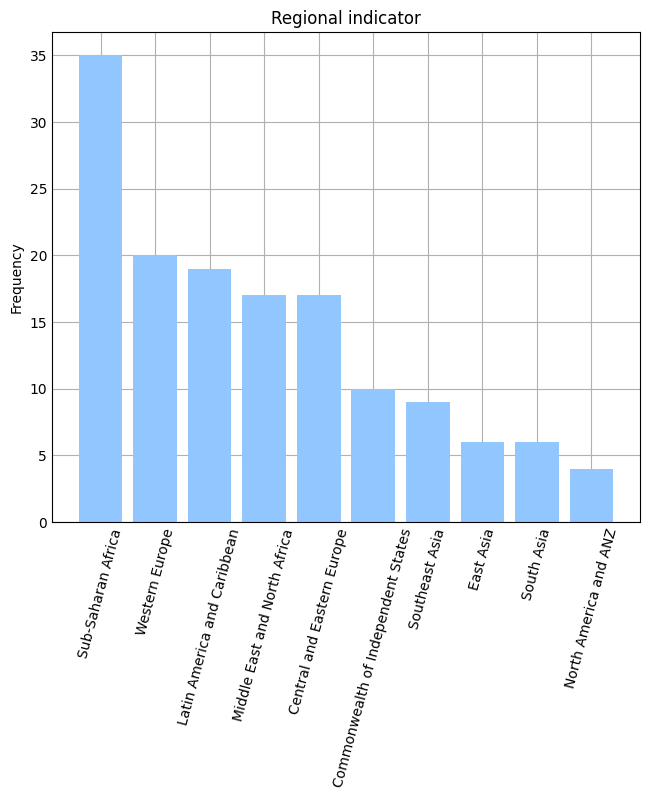

In [279]:
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(6, 5))
    plt.bar(varValue.index, varValue)
    plt.xticks(rotation=75)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

bar_plot("Regional indicator")


### 5.3 Heatmap Kullanarak Görselleştirme

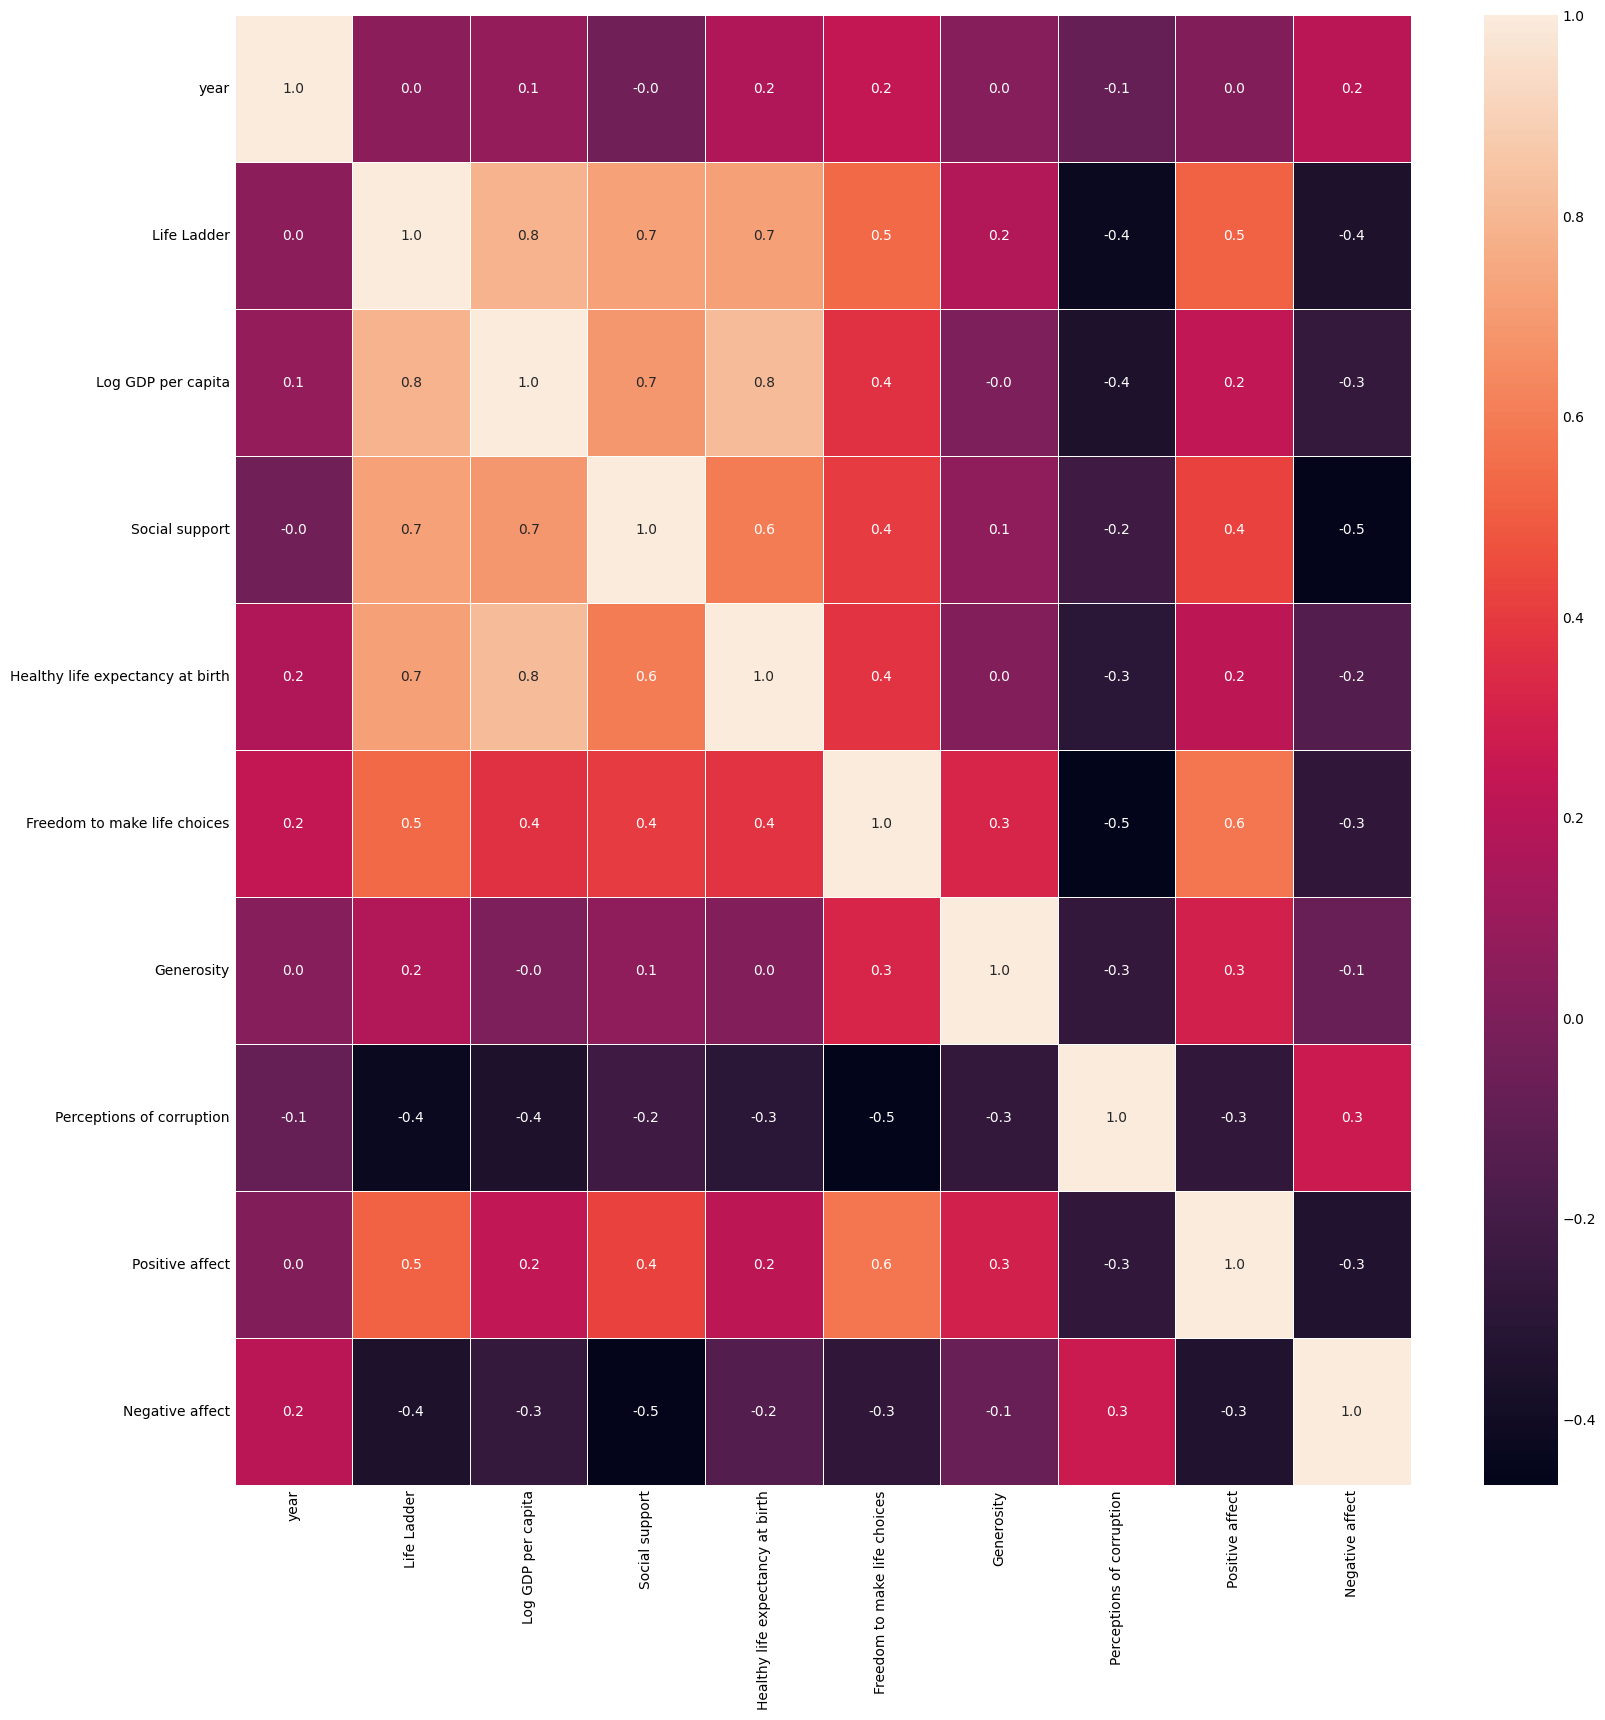

In [280]:
heatmap = data1.drop(columns=["Country name"]).select_dtypes(include=["float64", "int64"])
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(heatmap.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.show()

**Bazı değerler integer ve float tipinde olmadığı için select_types fonksiyonu ile sadece float ve integer değerleri seçildi.**

### 5.4 Farklı verilere göre Histogram Grafiği

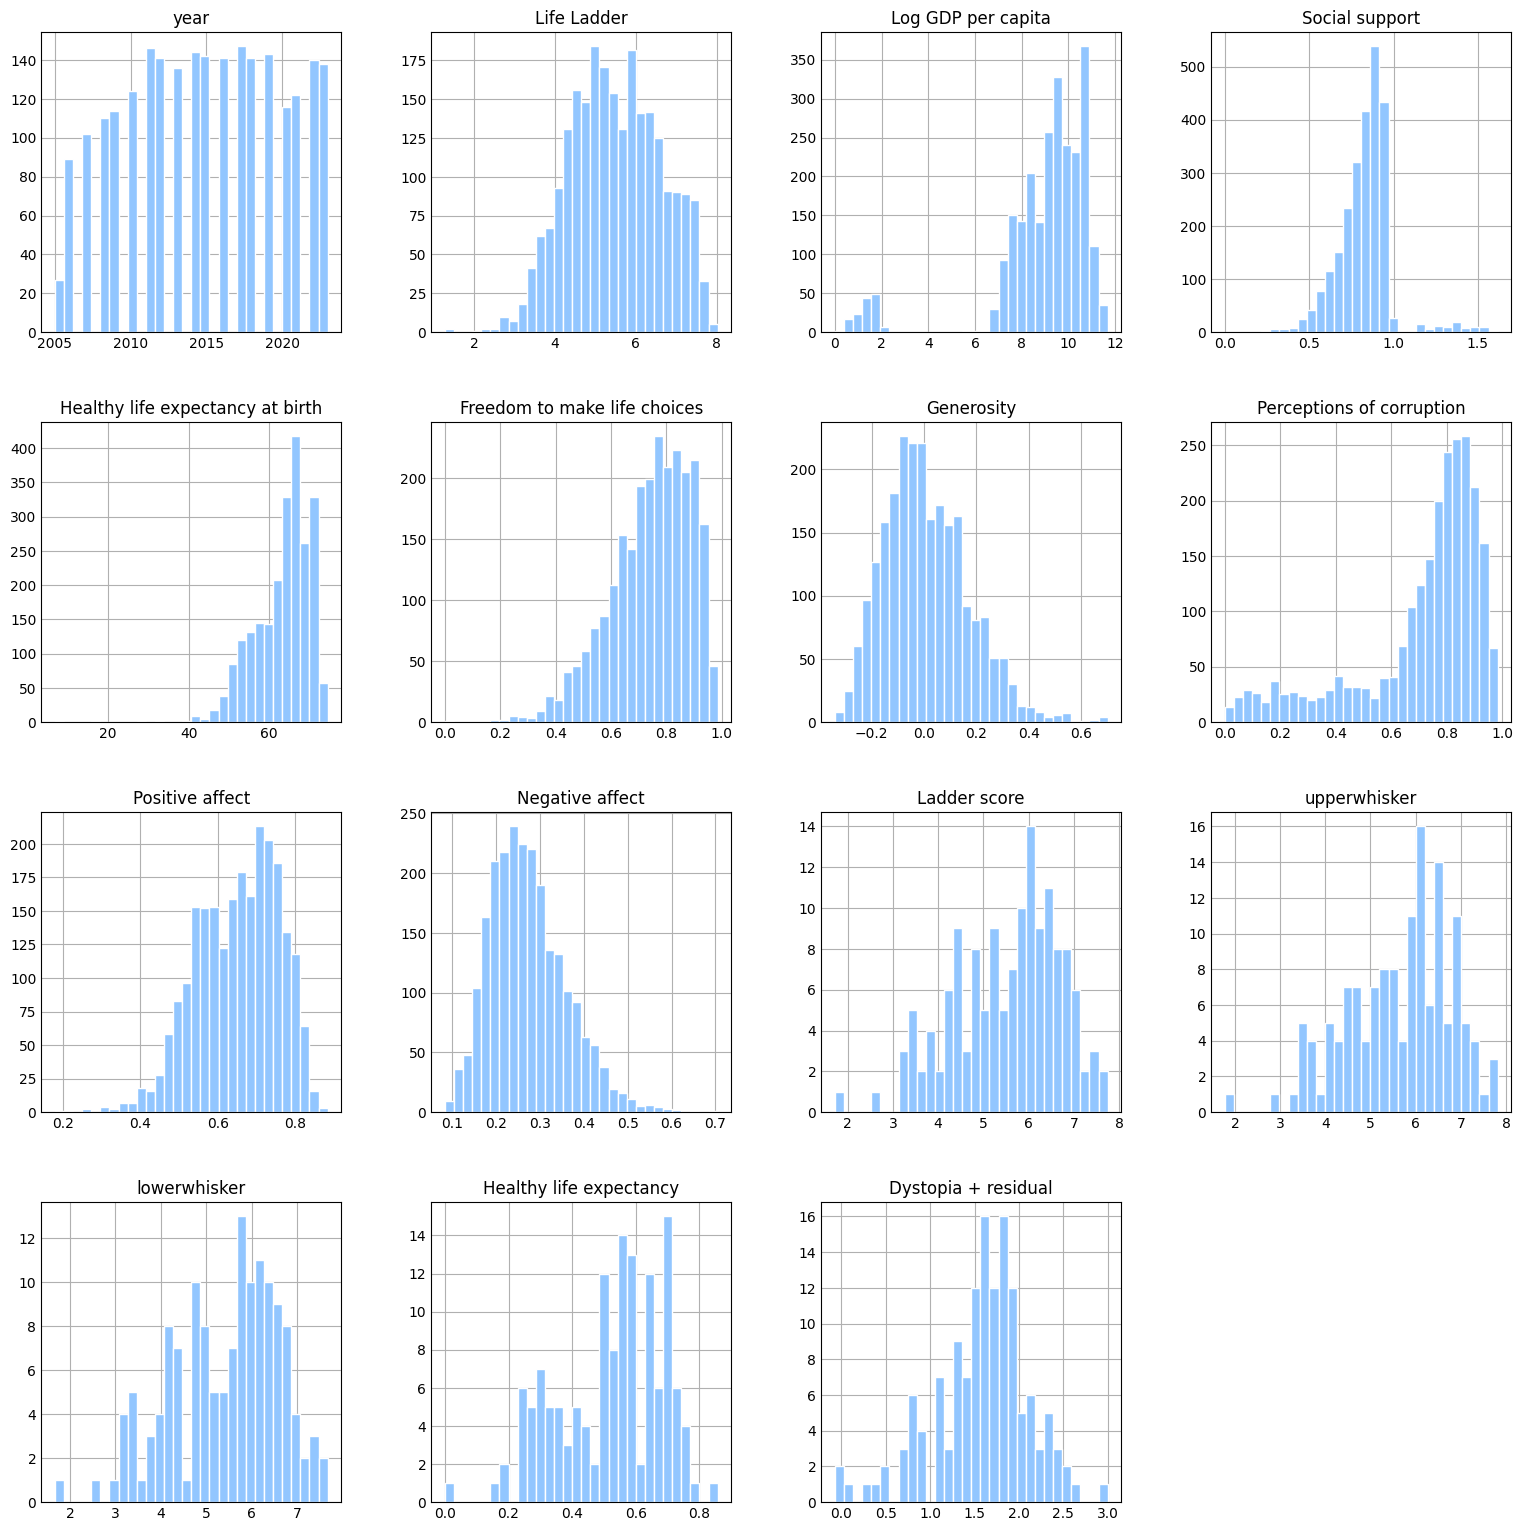

In [281]:
data.hist(figsize=(15, 15), bins=30, edgecolor='white')
plt.show()

### 5.5 Farklı Verilere Göre Pair Plot Gösterimi

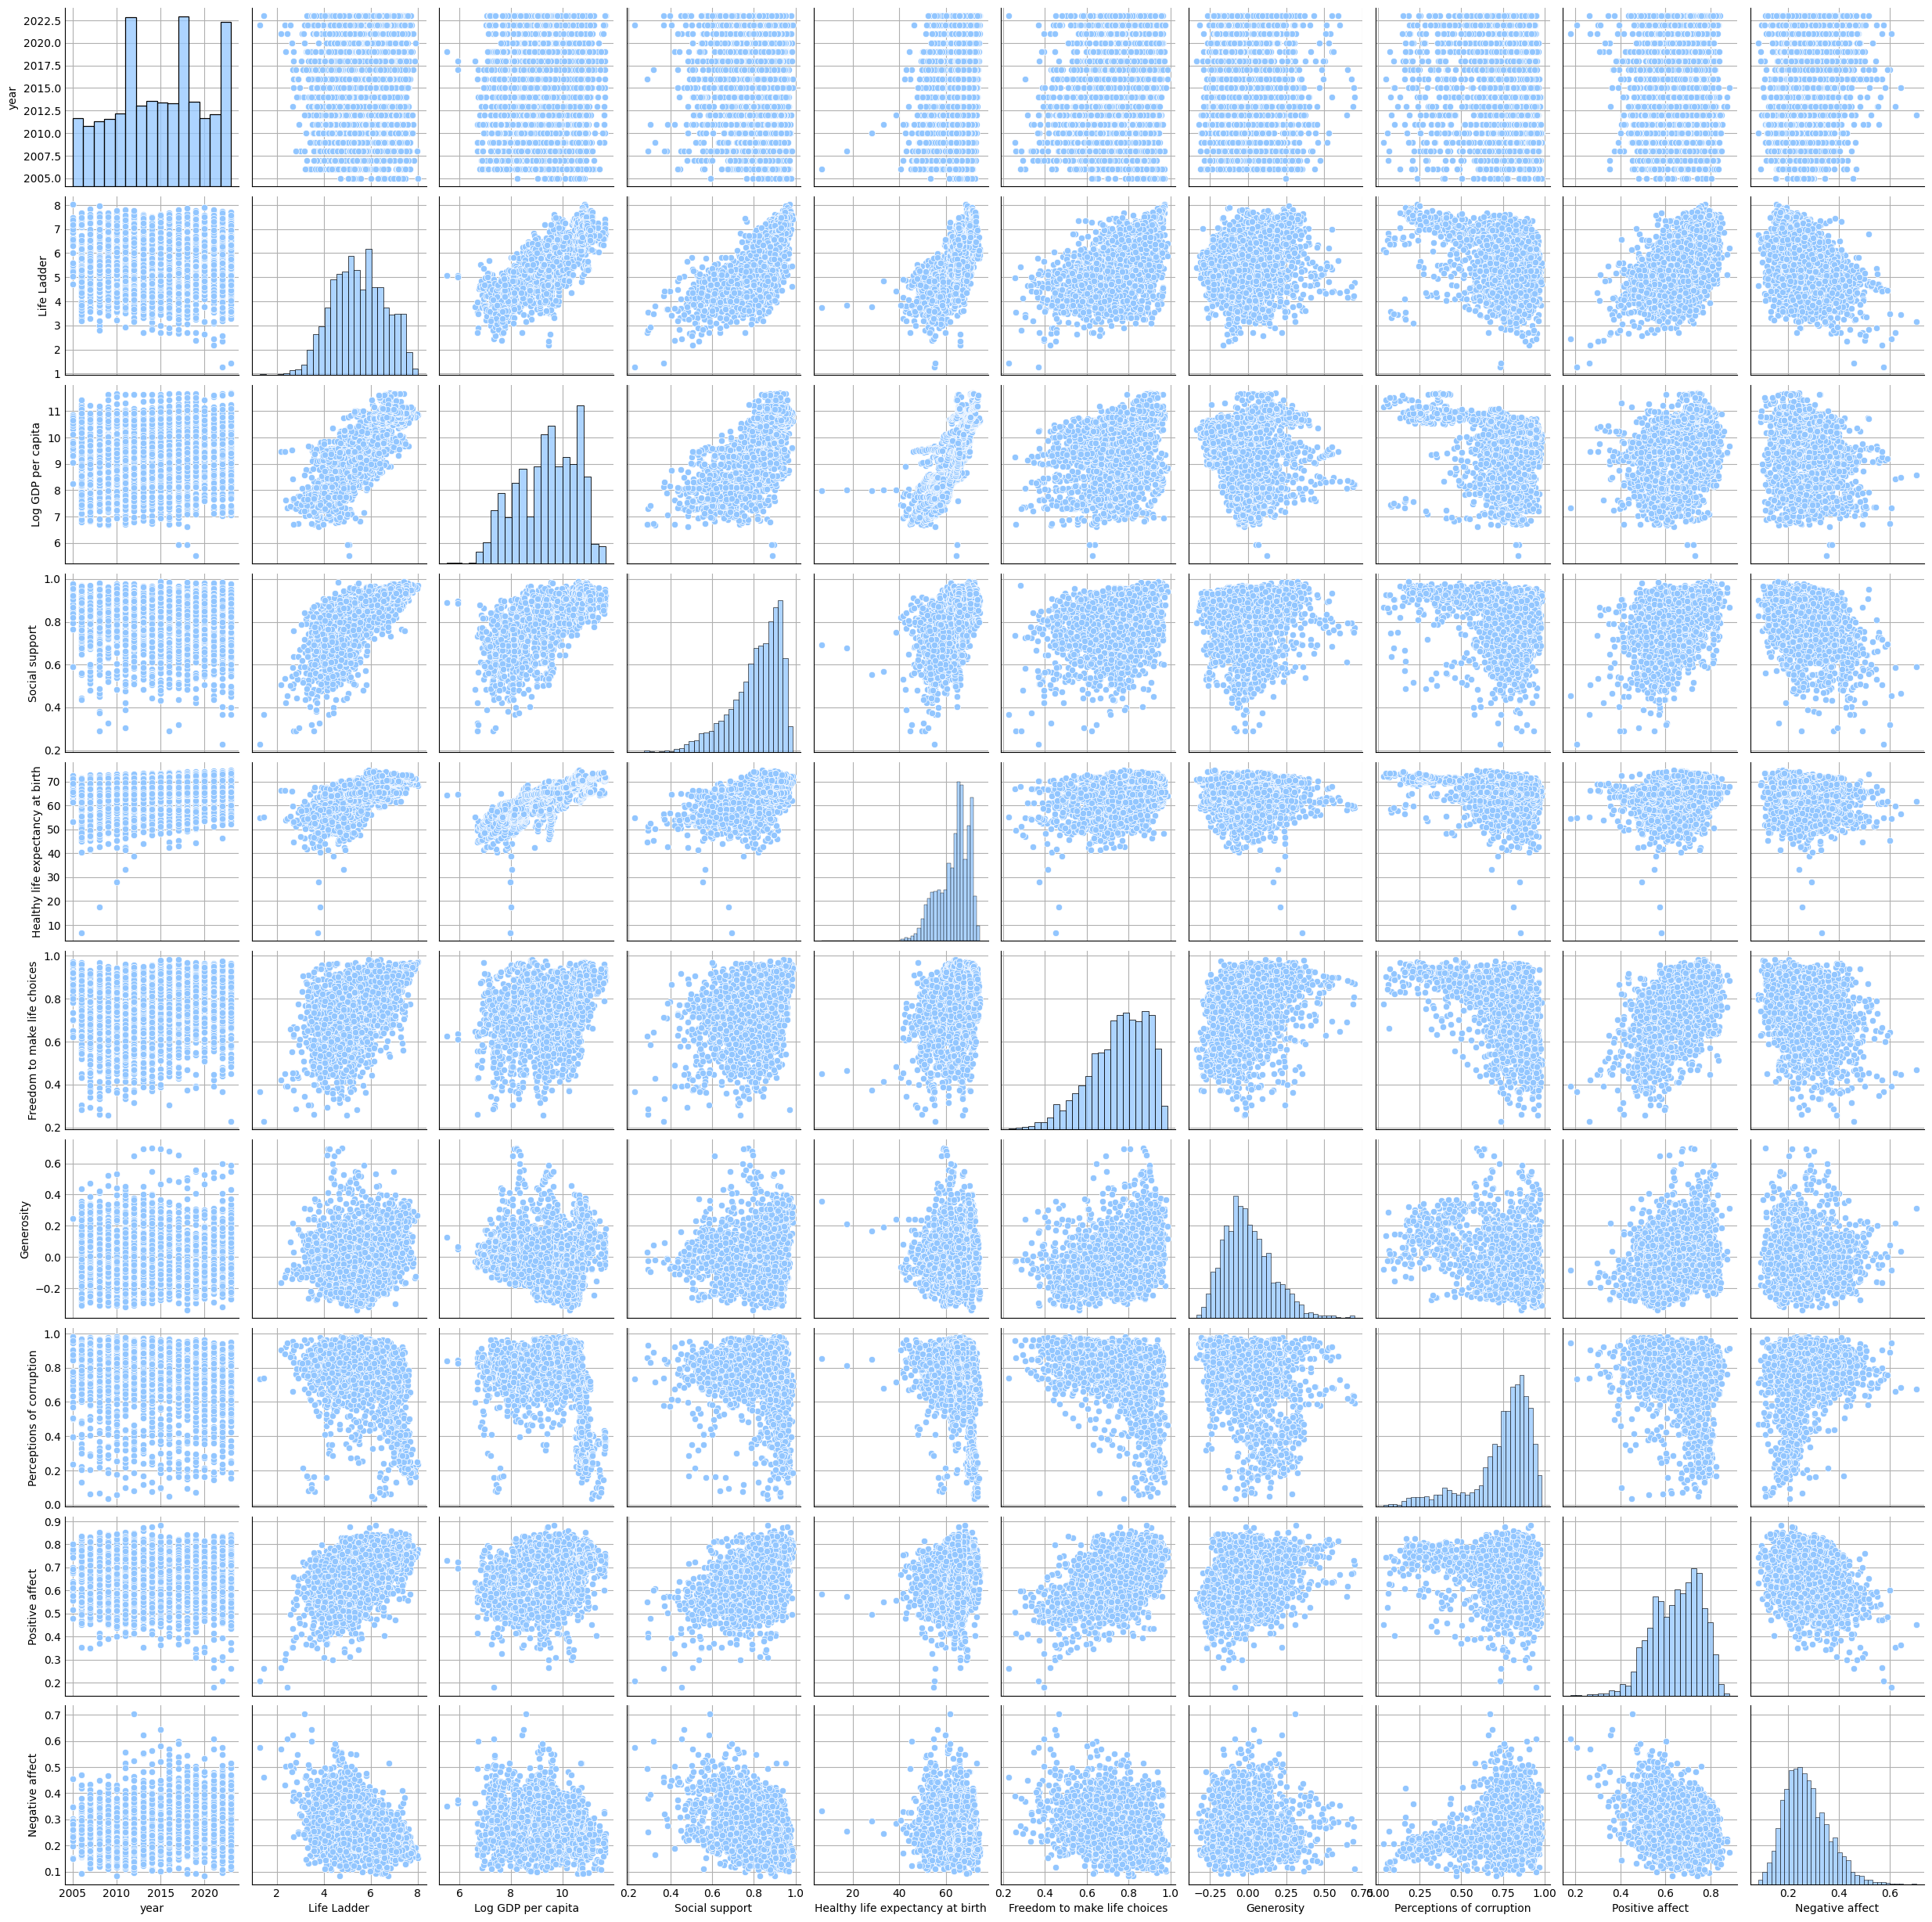

In [282]:
sns.pairplot(data1)

### 5.5 En Mutlu ve En Mutsuz Ülkeler

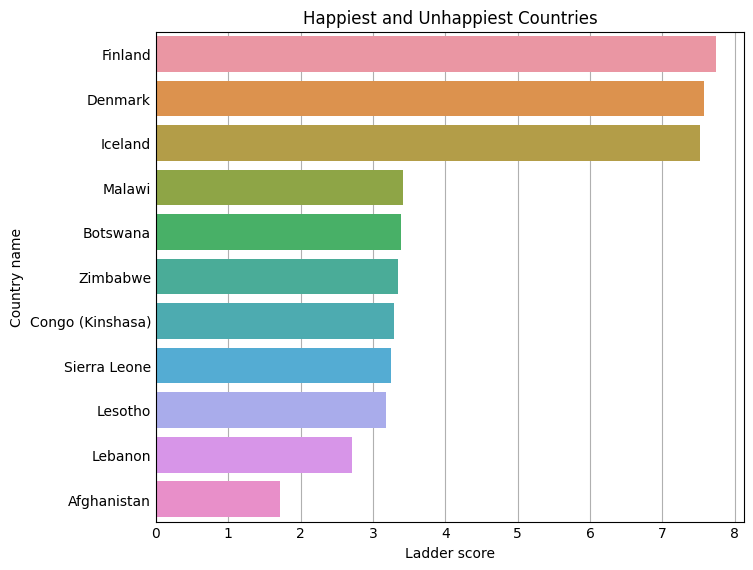

In [283]:
def happiest(variable):
    plt.figure(figsize=(6, 5))
    sns.barplot(x = "Ladder score", y = "Country name", data=happiest_unhappiest)
    plt.title("Happiest and Unhappiest Countries")
    plt.show()

happiest("Country name")

### 5.6 Bölgelere Göre Violin Plot Kullanarak Sağlık Yaşam Beklenti Grafiği  

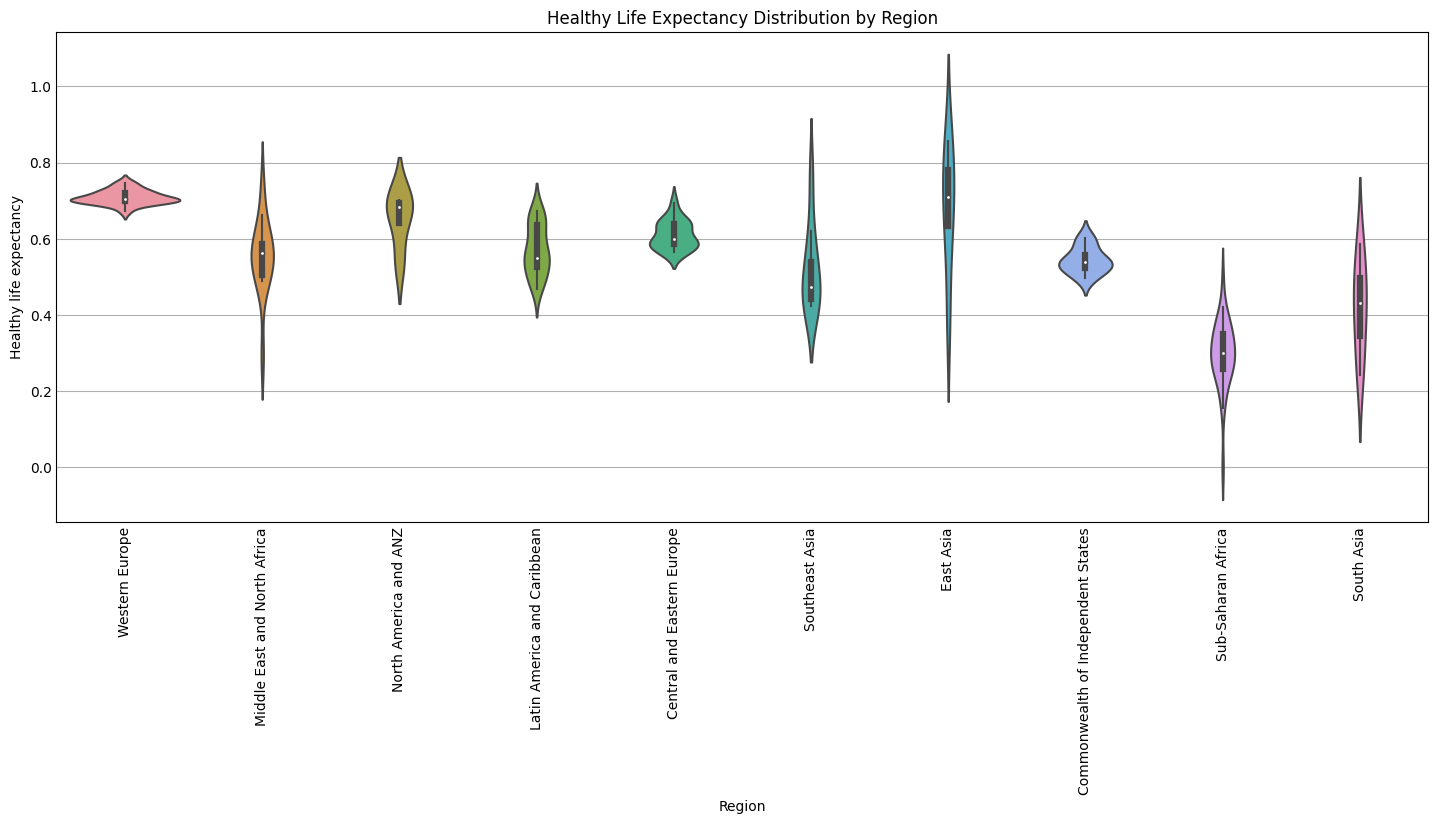

In [284]:
def plot_violin(variable):
    plt.figure(figsize=(14,5))
    sns.violinplot(data=data, x="Regional indicator", y="Healthy life expectancy")
    plt.xticks(rotation=90)
    plt.xlabel("Region")
    plt.ylabel("Healthy life expectancy")
    plt.title("Healthy Life Expectancy Distribution by Region")
    plt.show()
    
plot_violin("Healthy life expectancy")

### 5.7 Swarm Plot Yöntemi İle Cömertlik Dağılımı

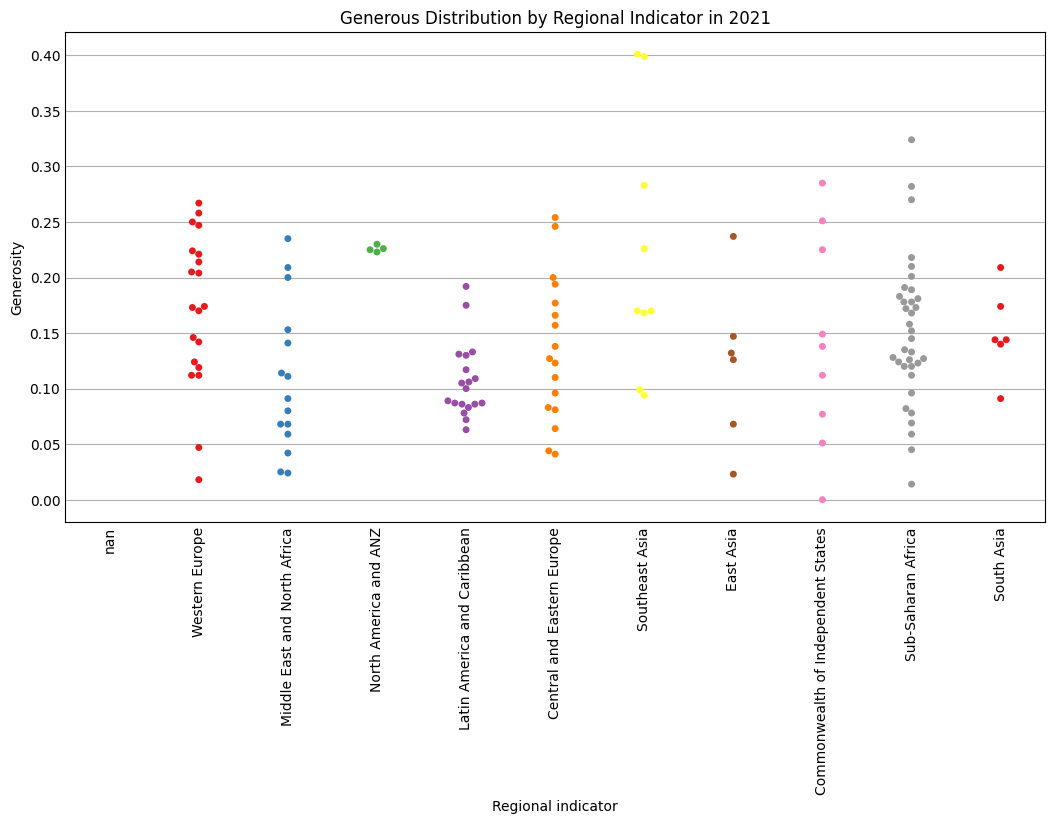

In [285]:
def swarm_plot(variable):
    plt.figure(figsize=(10,5))
    sns.swarmplot(data=data, x = "Regional indicator", y = "Generosity", palette="Set1")
    plt.xticks(rotation = 90)
    plt.title("Generous Distribution by Regional Indicator in 2021")
    plt.show()

swarm_plot("Generosity")

### 5.8 Verilere Bölgelere göre Karşılaltırma Yapan Grafik

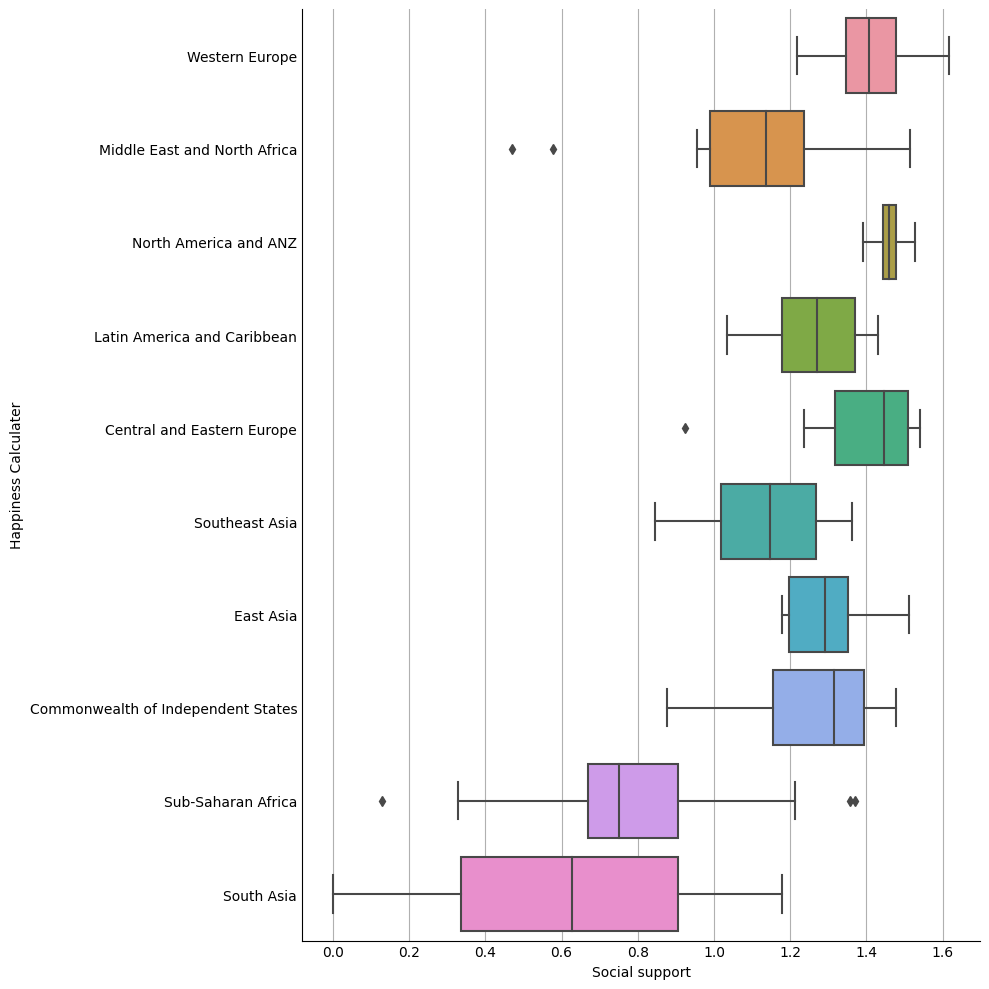

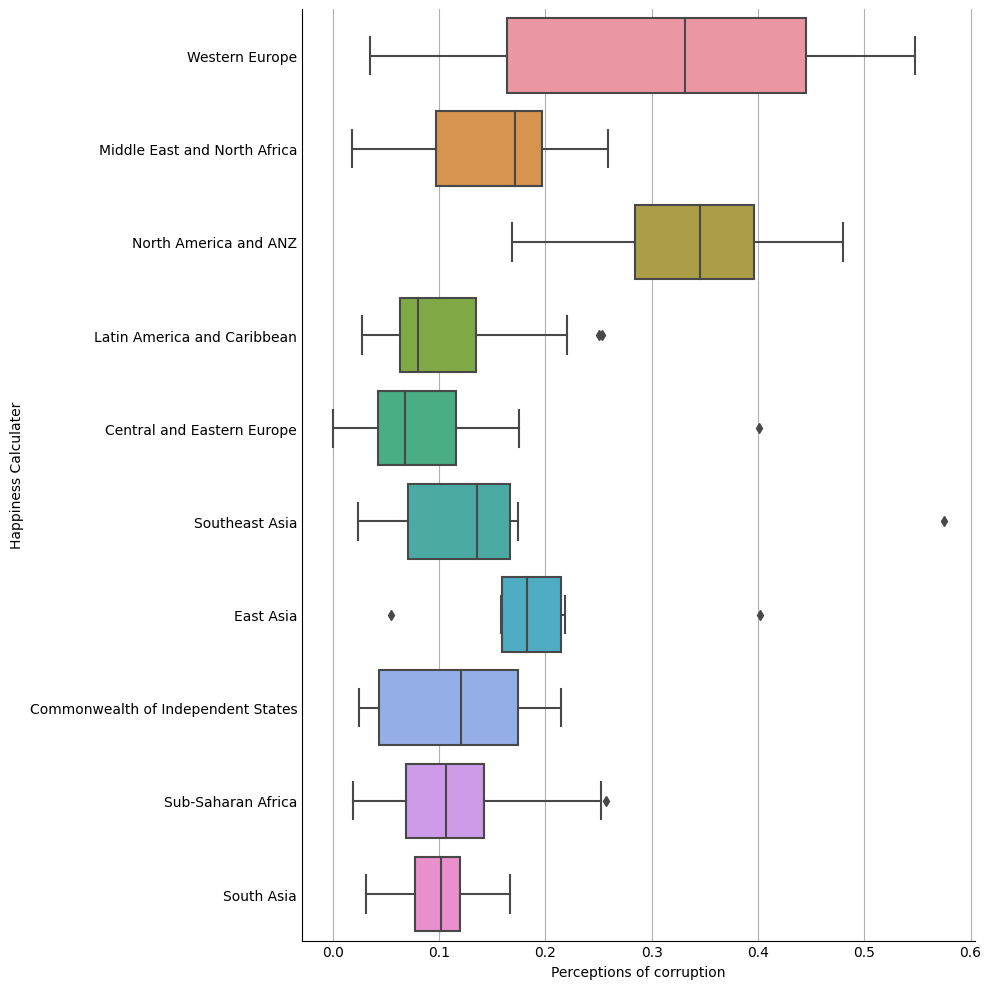

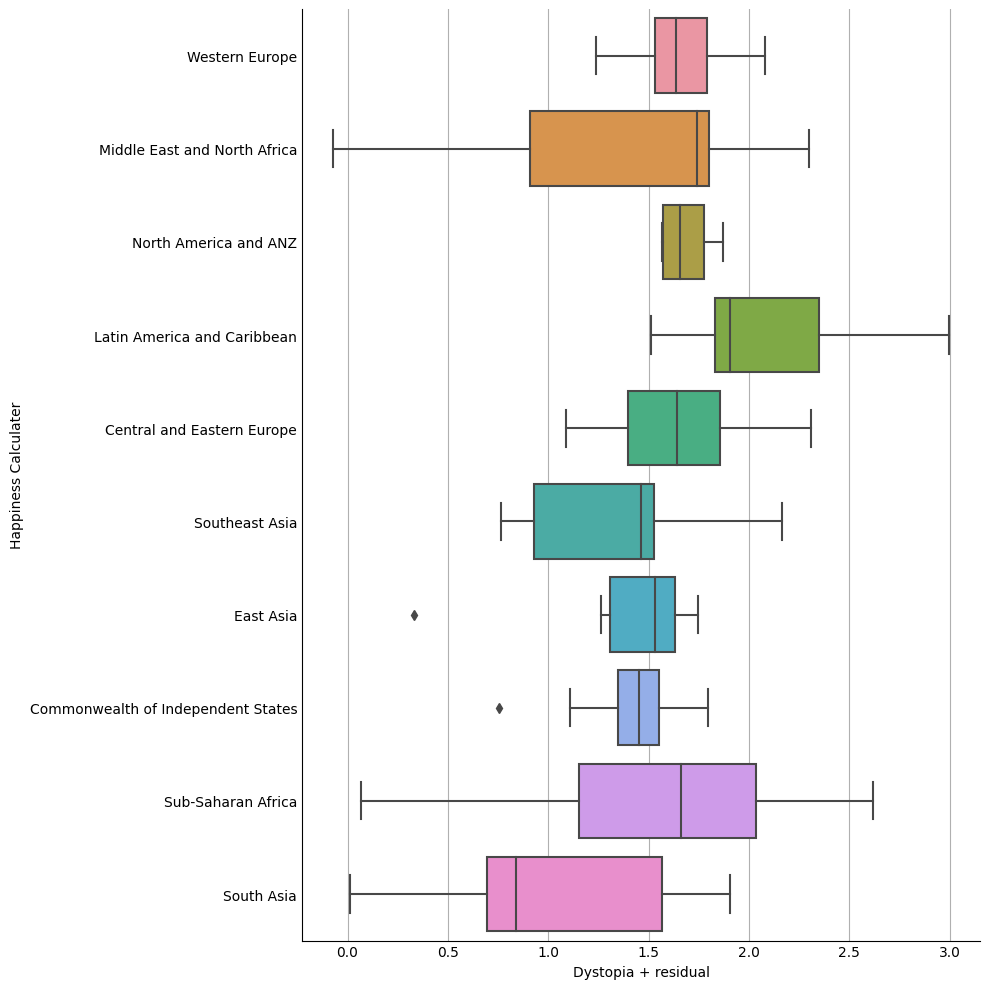

In [286]:
data_list = ['Social support','Perceptions of corruption','Dystopia + residual']
def catplot(variable):
    compare= sns.catplot(x = variable, y = "Regional indicator", data = data, kind = "box", height = 10)
    compare.set_ylabels("Happiness Calculater")
    plt.show()

for i in data_list:
    catplot(i)